# 1. Exploring players in the NHL

---

**To be able to execute this notebook, please download your own local version of the data from https://www.kaggle.com/camnugent/predict-nhl-player-salaries and store it into the folder "data/nhl/nhl_salaries/".** 

**In addition, download the file [simplemaps_worldcities_basicv1.74.zip](https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.74.zip) from [https://simplemaps.com/data/world-cities](https://simplemaps.com/data/world-cities) and unpack it to the folder "data/cities/".**

---

Importing useful libraries to expore players data:

In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

## Load dataset

Dataset [NHL Player Salaries](https://www.kaggle.com/camnugent/predict-nhl-player-salaries) consists of two main files, *train.csv* and *test.csv*. To get data for all players, both files will be read and merged using the *concat* funtion.

In [2]:
df_players_train = pd.read_csv('data/nhl/nhl_salaries/train.csv')
df_players_test = pd.read_csv('data/nhl/nhl_salaries/test.csv')

df_players = pd.concat([df_players_train, df_players_test])

Getting familiar with the data in the DataFrame **df_player**:

In [3]:
df_players.columns.shape

(154,)

In [4]:
pd.options.display.max_columns=52

In [5]:
df_players[df_players.columns[:52]].head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist
0,925000.0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0
1,2250000.0,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4
2,8000000.0,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4
3,3500000.0,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1
4,1750000.0,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9


In [6]:
df_players[df_players.columns[52:102]].head()

,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd
0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2
2,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19
3,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0
4,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7


In [7]:
df_players[df_players.columns[102:]].head()

,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [8]:
df_players.shape

(874, 154)

In [9]:
df_players.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 261
Data columns (total 154 columns):
 #    Column      Dtype  
---   ------      -----  
 0    Salary      float64
 1    Born        object 
 2    City        object 
 3    Pr/St       object 
 4    Cntry       object 
 5    Nat         object 
 6    Ht          int64  
 7    Wt          int64  
 8    DftYr       float64
 9    DftRd       float64
 10   Ovrl        float64
 11   Hand        object 
 12   Last Name   object 
 13   First Name  object 
 14   Position    object 
 15   Team        object 
 16   GP          int64  
 17   G           int64  
 18   A           int64  
 19   A1          int64  
 20   A2          int64  
 21   PTS         int64  
 22   +/-         int64  
 23   E+/-        float64
 24   PIM         int64  
 25   Shifts      int64  
 26   TOI         int64  
 27   TOIX        float64
 28   TOI/GP      float64
 29   TOI/GP.1    float64
 30   TOI%        float64
 31   IPP%        float64
 32   SH% 

DataFrame **df_player** contains interesting information about player in the NHL like, name, date of birth, place of birth, many statistics and of course player's salary.

---

## Let's make some exploration regarding team, positions, and salaries.

---
What teams do the players play for? Display top 10 teams:

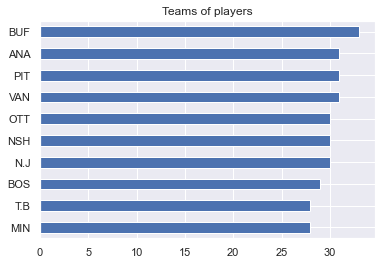

In [10]:
df_players['Team'].value_counts().sort_values(0, ascending=False)[:10].sort_values(0, ascending=True).plot(kind='barh', title='Teams of players');

---
Players by position. There are a lot of player in Defence (D), few less Center (C), Right Wings (RW), and Left Wings (LW). This make of course sense, because there are 2 defence players (D) in the field, but just 1 player for C, RW, LW each.

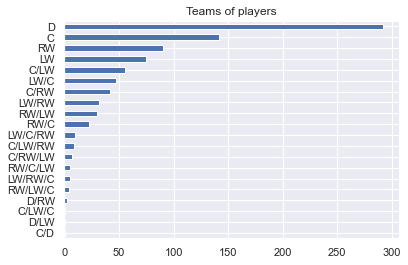

In [11]:
df_players.Position.value_counts().sort_values(0, ascending=True).plot(kind='barh', title='Teams of players');

This is interesting. There are apparently several players able to play in the Defence AND in the Offence. 

---
What is this combination worth (in salary)?

In [12]:
df_players[df_players.Position.isin(['C/D', 'D/LW'])]

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,...,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
332,792500.0,89-07-27,Ivry-sur-Seine,NaN,FRA,FRA,71,191,NaN,NaN,NaN,L,Auvitu,Yohann,D/LW,N.J,25,2,2,1,1,4,1,0.1,2,505,...,43.0,13.0,10.0,6.0,9.0,10.0,16.0,16,25,177.0,146.0,130.0,169.0,58.0,40.0,26.0,23.0,0.2,1.1,1.3,958.64,31,27.0,101.7,7.9,0.31
577,925000.0,97-01-30,Boston,MA,USA,USA,72,183,2015.0,1.0,21.0,R,White,Colin,C/D,OTT,2,0,0,0,0,0,0,-0.3,0,34,...,4.0,1.0,0.0,0.0,2.0,0.0,1.0,0,3,8.0,15.0,8.0,5.0,1.0,2.0,0.0,2.0,-0.1,0.0,0.0,85.45,1,0.0,105.0,0.1,0.03


---
What is the distribution of salary?

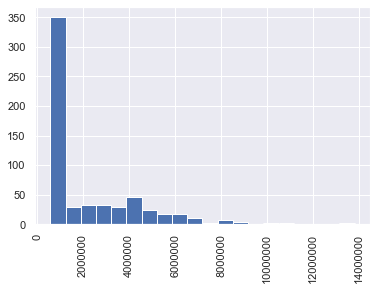

In [13]:
plt.hist(x=df_players.Salary, bins=20);
plt.xscale('linear')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 0));
plt.xticks(rotation=90);

This looks like around 1 Million or less is the most common salary in the NHL. Is interesting to see what is the average salary in NHL. We can calculate **mean** and to avoid outliers also **median**:

In [14]:
print(f'Mean od salary is ${df_players.Salary.mean():.2f}')
print(f'Median od salary is ${df_players.Salary.median():.2f}')

Mean od salary is $2264508.78
Median od salary is $925000.00


This means the are indeed some outliers with extremely high salaries. This are the best earning players:

In [15]:
df_players.sort_values(by='Salary', ascending=False)[['First Name', 'Last Name', 'Team', 'Salary']][:10]

,First Name,Last Name,Team,Salary
103,Patrick,Kane,CHI,13800000.0
496,Jonathan,Toews,CHI,13800000.0
542,Shea,Weber,MTL,12000000.0
208,P.K.,Subban,NSH,11000000.0
145,Sidney,Crosby,PIT,10900000.0
226,Jakub,Voracek,PHI,10000000.0
260,Alex,Ovechkin,WSH,10000000.0
594,Evgeni,Malkin,PIT,9500000.0
608,Ryan,Suter,MIN,9000000.0
191,Zach,Parise,MIN,9000000.0


## Where are all the players coming from?

Exploration of the city and country of birth.

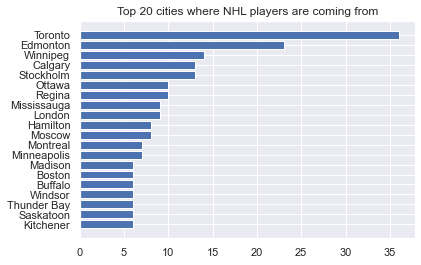

In [16]:
# What are the cities the most number of players is coming from:

df_city_cnt = df_players.City.value_counts()[:20].reset_index().rename(columns={'City':'cnt', 'index':'city'}).sort_values('cnt')

plt.barh(df_city_cnt.city, df_city_cnt.cnt);
plt.title('Top 20 cities where NHL players are coming from');

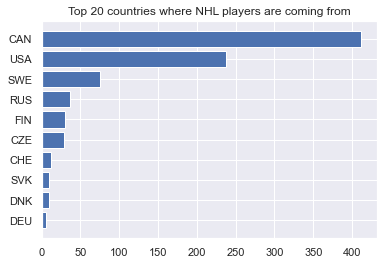

In [17]:
# What are the countries the most number of players is coming from:

df_country_cnt = df_players.Cntry.value_counts()[:10].sort_values(0).reset_index().rename(columns={'Cntry':'cnt', 'index':'country'})

plt.barh(df_country_cnt.country, df_country_cnt.cnt);
plt.title('Top 20 countries where NHL players are coming from');

### Let's get GPS coordinates and visualize it on the map

To plot locations on the map, the GPS data is necessary. The original dataset misses this information. That's why we need another table containing cities of the world and their GPS coordinates and to enrich to original DataFrame. One such dataset can be downloaded from the [World Cities Database](https://simplemaps.com/data/world-cities).

In [18]:
# Downloaded next dataset with cities and GPS from https://simplemaps.com/data/world-cities
df_cities = pd.read_csv('data/cities/worldcities.csv')
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [19]:
# merge players and lat/lng coordinates
df_players_with_cities = df_players.merge(df_cities[['city_ascii', 'iso3', 'lat', 'lng']], how='left', left_on=['City', 'Cntry'], right_on=['city_ascii', 'iso3'])
df_players_with_cities.shape

(1149, 158)

There are apparently duplicates in city+iso3. Let's see 5 top most duplicated cities and investigate.

In [20]:
df_gps = df_cities[['city_ascii', 'iso3', 'lat', 'lng']]
df_gps.groupby(['city_ascii', 'iso3']).size().reset_index().sort_values(0, ascending=False)[:5]

,city_ascii,iso3,0
11381,Franklin,USA,16
36755,Washington,USA,16
32356,Springfield,USA,16
7615,Clinton,USA,14
15256,Jackson,USA,13


Why are these cities duplicated? Are those real duplicates or just messy data? Let's have a look at the city *Jackson* to see more.

In [21]:
df_cities[(df_cities.city_ascii=='Jackson') & (df_cities.iso3=='USA')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1952,Jackson,Jackson,32.3163,-90.2124,United States,US,USA,Mississippi,admin,325350.0,1840014895
10654,Jackson,Jackson,42.2431,-84.4037,United States,US,USA,Michigan,NaN,87110.0,1840003173
11185,Jackson,Jackson,35.6535,-88.8353,United States,US,USA,Tennessee,NaN,74065.0,1840014528
12265,Jackson,Jackson,40.0980,-74.3579,United States,US,USA,New Jersey,NaN,56968.0,1840081610
23584,Jackson,Jackson,37.3792,-89.6521,United States,US,USA,Missouri,NaN,14836.0,1840008735
25723,Jackson,Jackson,43.4721,-110.7745,United States,US,USA,Wyoming,NaN,12576.0,1840021258
27077,Jackson,Jackson,39.0460,-82.6492,United States,US,USA,Ohio,NaN,11462.0,1840008548
30871,Jackson,Jackson,40.3774,-76.3142,United States,US,USA,Pennsylvania,NaN,8853.0,1840143432
32368,Jackson,Jackson,39.9057,-76.8796,United States,US,USA,Pennsylvania,NaN,8081.0,1840151964
33450,Jackson,Jackson,38.3485,-120.7728,United States,US,USA,California,NaN,7550.0,1840018852


OK, there are apparently many cities with the same name in the same country. No chance to assign all player to a city exactly 
based on the city name and country only. 
I don't want to randomly pick any of this cities and assign it to the player. A better way is to accept multiple assignments 
and to plot anyway. 
The rule is: If we don't know which e.g. 'Jackson' exactly is the player from, we simply plot all of them. 
             There is no harm in the visual perception and it still provides very good overview on the map.
             
             
---

Checking NaNs in the data and dropping players completely without a city. This drop is just for the visualization altough.

In [22]:
df_players_with_cities[['lat', 'lng']].isna().sum()

lat    166
lng    166
dtype: int64

In [23]:
# drop players with no city found for now
df_players_with_cities.dropna(subset=['lat', 'lng'], inplace=True)

----

And plotting the location.

#### (move the cursor over the dots to see name of the city)

In [24]:
coords=df_players_with_cities[['lat', 'lng']].values.tolist()
names=df_players_with_cities[['First Name', 'Last Name', 'City']].values.tolist()

loc_map = folium.Map(location=[df_cities['lat'].median(), df_cities['lng'].median()], zoom_start=2, tiles='cartodbpositron', width=640, height=480)
[folium.CircleMarker(coords[i], radius=0.0001, color='#800000', tooltip=f'{names[i][0]} {names[i][1]}, {names[i][2]}').add_to(loc_map) for i in range(len(coords))]
loc_map



As we can see, North America and Europe and both continents with most players in the NHL.